In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
pd.set_option('display.max_columns', None)

In [121]:
df = pd.read_csv("C:\\Users\\Dell\\campusx_badhiya_wala_project_isi_folder_me_sab_h\\gurgaon_properties_cleaned_v2.csv").drop_duplicates()

In [122]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss residency,sector 6,0.48,5333.0,900.0,Carpet area: 100 (83.61 sq.m.),3,2,2,2.0,NaN,Moderately Old,NaN,NaN,100.0,0,0,0,0,0,0,54
1,flat,ansal housing highland park,sector 103,1.10,6242.0,1762.0,Super Built up area 1762(163.7 sq.m.)Built Up ...,3,3,3+,7.0,North-East,New Property,1762.0,1500.0,1300.0,0,0,0,0,0,0,87
2,flat,sapphire eighty three,sector 83,0.65,9286.0,700.0,Built Up area: 700 (65.03 sq.m.),1,1,0,6.0,NaN,Undefined,NaN,700.0,NaN,0,0,0,0,0,0,0
3,flat,unitech the residences,sector 33,1.35,8737.0,1545.0,Super Built up area 1545(143.54 sq.m.),3,4,2,8.0,North-East,Moderately Old,1545.0,NaN,NaN,0,1,0,0,0,0,49
4,flat,m3m capital,sector 113,3.25,14142.0,2298.0,Carpet area: 2298 (213.49 sq.m.),4,4,3+,34.0,NaN,Under Construction,NaN,NaN,2298.0,1,1,0,1,0,0,115


In [123]:
df.shape

(3677, 23)

In [125]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\Dell\AppData\Local\Temp\ipykernel_23624\2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

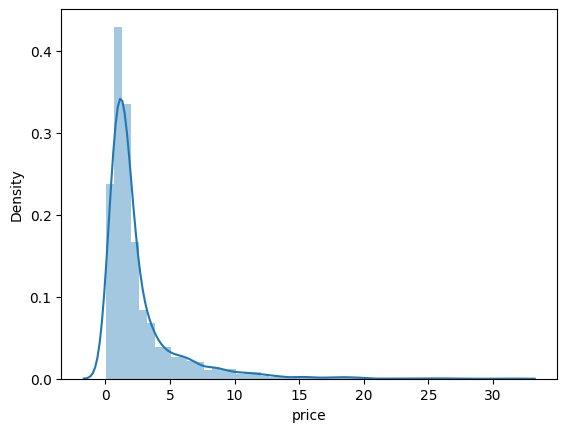

In [126]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

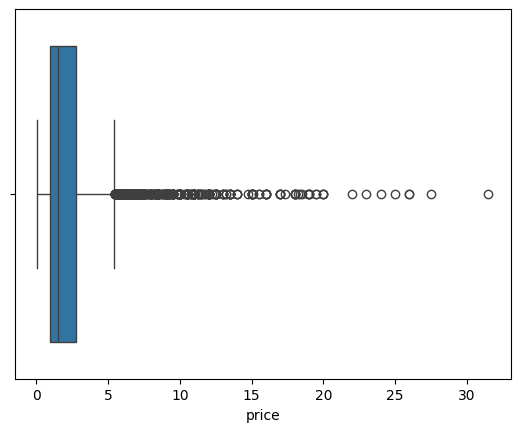

In [127]:
sns.boxplot(x=df['price'])


In [128]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats


(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [129]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3724,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,2,74
1155,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,1254.0,NaN,1,1,0,1,1,1,42
1619,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,505.0,NaN,1,1,0,1,1,1,138
450,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
972,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
1563,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
2608,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,1000.0,NaN,1,1,1,1,0,1,145
1020,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
2773,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31
3273,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,500.0,NaN,0,1,0,1,0,2,97


# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

# Price_per_sqft

C:\Users\Dell\AppData\Local\Temp\ipykernel_23624\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

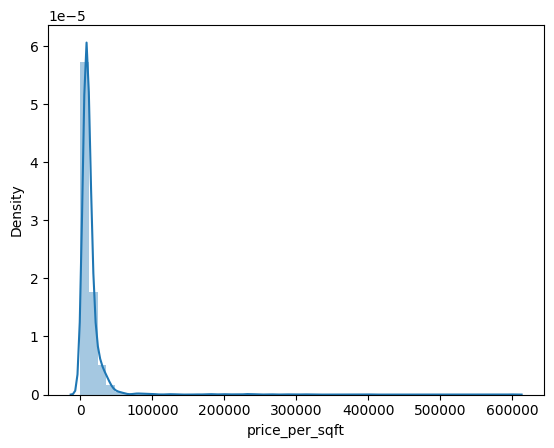

In [130]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

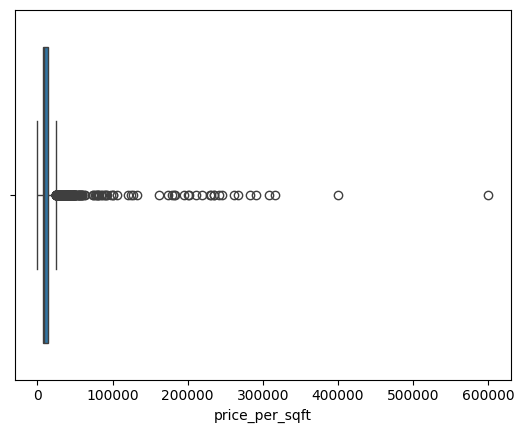

In [131]:
sns.boxplot(x=df['price_per_sqft'])

In [133]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [134]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\Dell\AppData\Local\Temp\ipykernel_23624\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [135]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_23624\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [136]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [137]:
df.update(outliers_sqft)


C:\Users\Dell\AppData\Local\Temp\ipykernel_23624\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

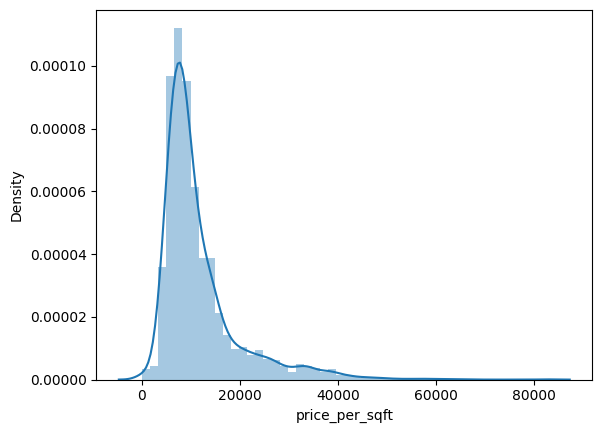

In [138]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

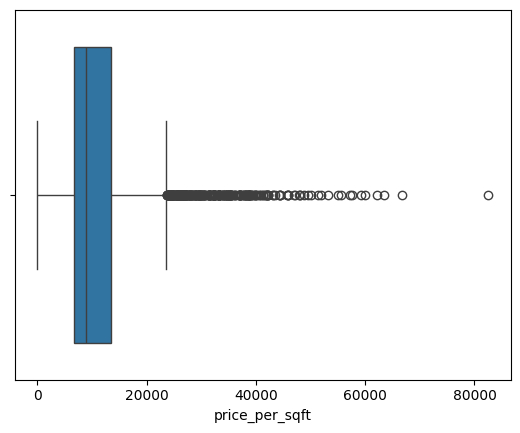

In [139]:
sns.boxplot(x=df['price_per_sqft'])

In [140]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
131,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,316.0,NaN,1,1,1,1,0,1,153
450,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
742,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,1,99
874,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,1,103
1542,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,250.0,NaN,1,1,0,0,0,1,160
1563,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
1604,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,2,72
1619,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,505.0,NaN,1,1,0,1,1,1,138
1867,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,0,0
2071,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,0,0


In [141]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

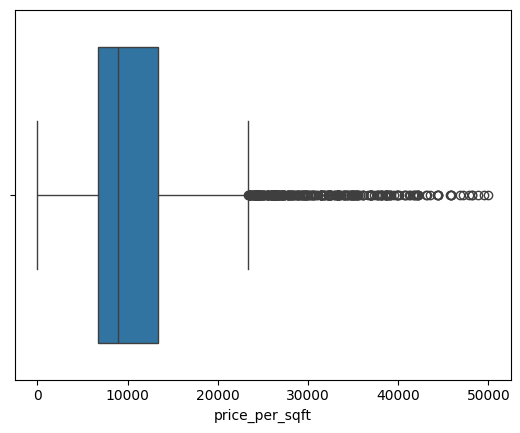

In [142]:
sns.boxplot(x=df['price_per_sqft'])


# Area

C:\Users\Dell\AppData\Local\Temp\ipykernel_23624\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

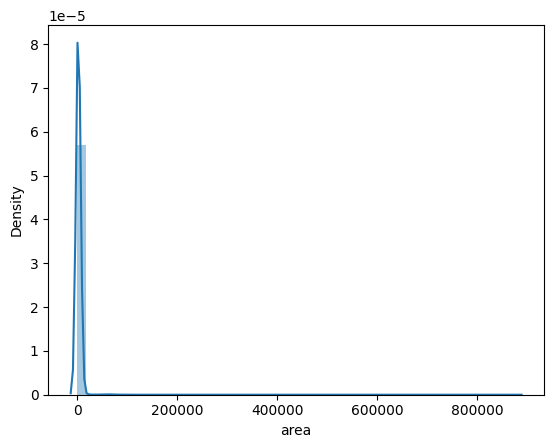

In [143]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

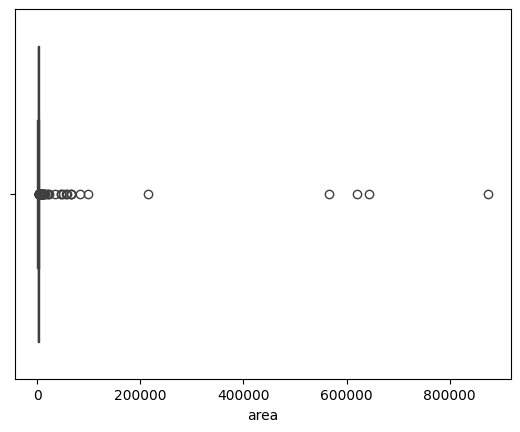

In [144]:
sns.boxplot(x=df['area'])

In [145]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [146]:
df[df['area'] > 100000]


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
397,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,1,0
1441,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
1587,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
1667,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
2595,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44


In [147]:
df = df[df['area'] < 100000]

C:\Users\Dell\AppData\Local\Temp\ipykernel_23624\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

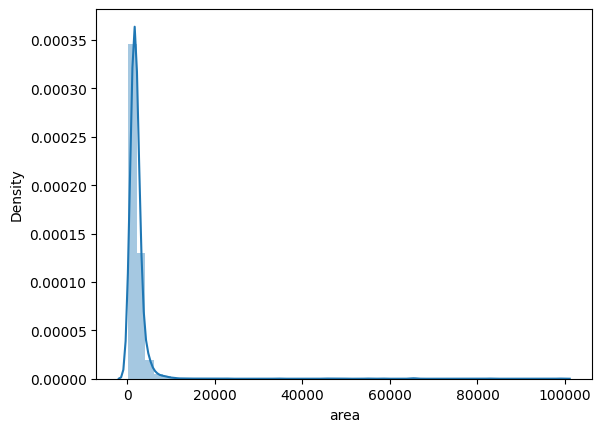

In [148]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

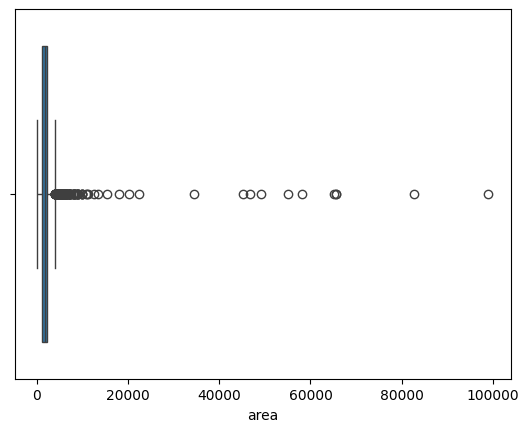

In [149]:
sns.boxplot(x=df['area'])

In [150]:
df[df['area'] > 10000].sort_values('area',ascending=False)
# 391,3415,1335,2624,257,3407,1085,3277,1731

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
391,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
2226,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
3415,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
1335,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
1524,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
2624,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
257,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
3407,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
859,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
1085,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [151]:
df.drop(index=[391,3415,1335,2624,257,3407,1085,3277,1731], inplace=True)

In [152]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2226,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
1524,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
859,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
2043,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,1,61
2203,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,1,123
1396,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.00,1,0,0,1,1,1,44
1512,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,0,160
3103,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,55
1155,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,1254.0,NaN,1,1,0,1,1,1,42
3224,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,0,60


In [153]:
df.loc[2226,'area'] = 115*9
df.loc[1524,'area'] = 7250
df.loc[859,'area'] = 5800
df.loc[2043,'area'] = 2660
df.loc[2203,'area'] = 2850
df.loc[1396,'area'] = 1812
df.loc[1512,'area'] = 2160
df.loc[3103,'area'] = 1175

C:\Users\Dell\AppData\Local\Temp\ipykernel_23624\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

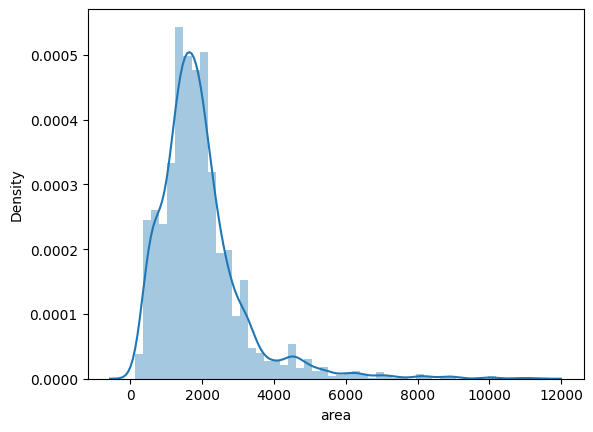

In [154]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

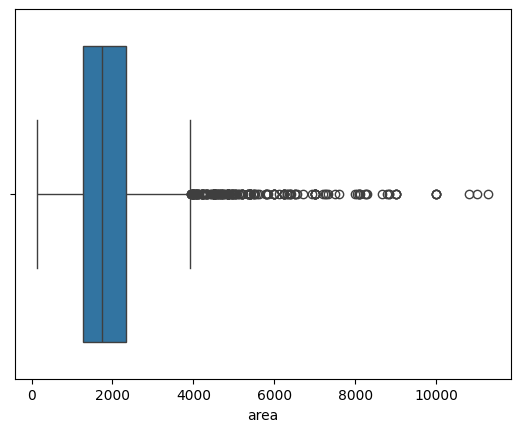

In [155]:
sns.boxplot(x=df['area'])

In [156]:
df['area'].describe()

count     3633.000000
mean      1950.357005
std       1215.707897
min        145.000000
25%       1260.000000
50%       1747.000000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

# Bedroom

C:\Users\Dell\AppData\Local\Temp\ipykernel_23624\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

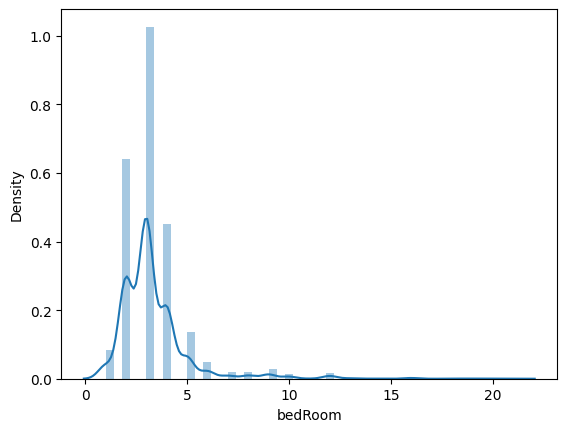

In [157]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

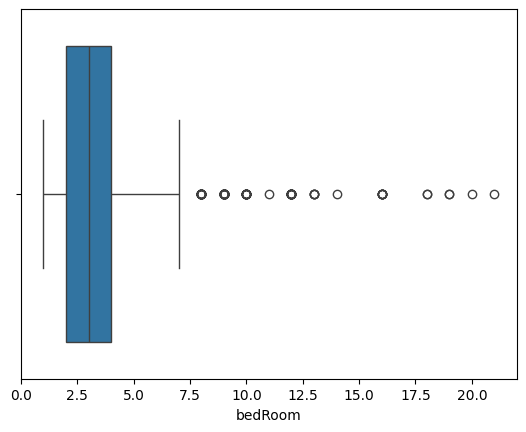

In [158]:
sns.boxplot(x=df['bedRoom'])

In [159]:
df['bedRoom'].describe()

count    3633.000000
mean        3.333609
std         1.830035
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [160]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
983,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,129.0,NaN,0,1,0,0,0,2,49
1447,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,128.0,NaN,0,1,0,0,0,2,22
1170,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68
47,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,74
2941,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,167.0,NaN,0,0,0,0,1,2,57
3109,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,160.0,NaN,0,1,0,0,0,2,70
2810,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16,16,3+,4.0,South,Relatively New,NaN,200.0,NaN,0,0,0,0,0,1,20
1136,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,502.0,NaN,1,1,1,1,0,1,153
3276,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16,16,3+,4.0,North-West,Relatively New,NaN,300.0,NaN,1,1,0,1,1,0,41
1706,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,NaN,300.0,NaN,0,1,0,1,0,1,49


In [161]:
df = df[df['bedRoom'] <= 10]

In [162]:
df.shape

(3588, 23)

C:\Users\Dell\AppData\Local\Temp\ipykernel_23624\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

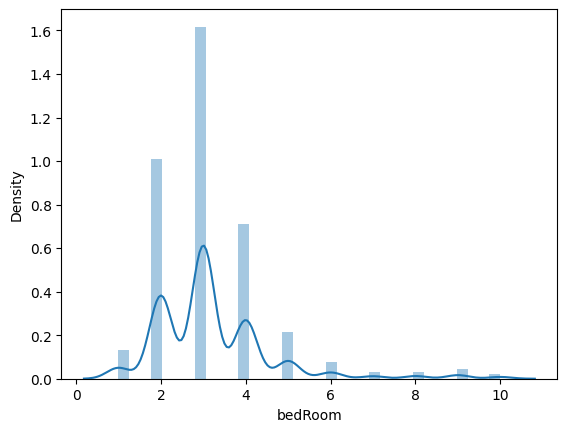

In [164]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

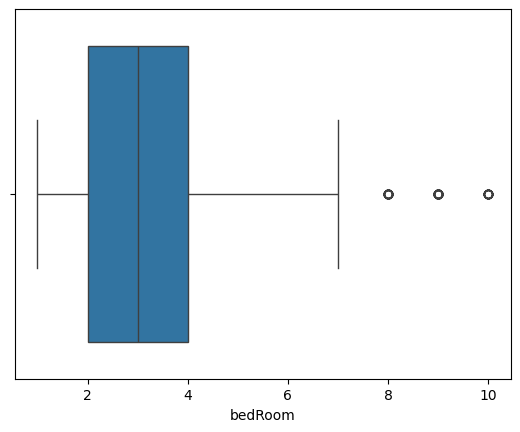

In [165]:
sns.boxplot(x=df['bedRoom'])

In [166]:
df['bedRoom'].describe()

count    3588.000000
mean        3.203735
std         1.393968
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

# Bathroom

C:\Users\Dell\AppData\Local\Temp\ipykernel_23624\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

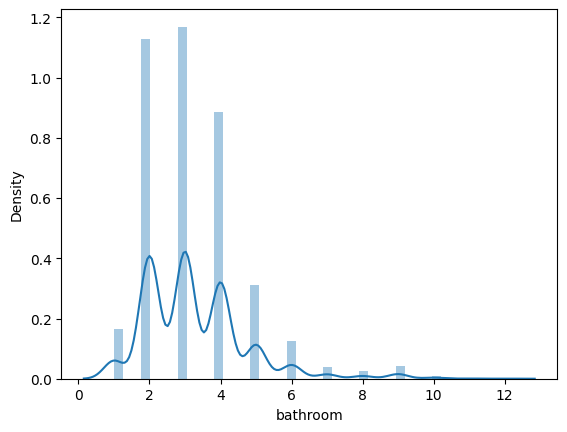

In [167]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

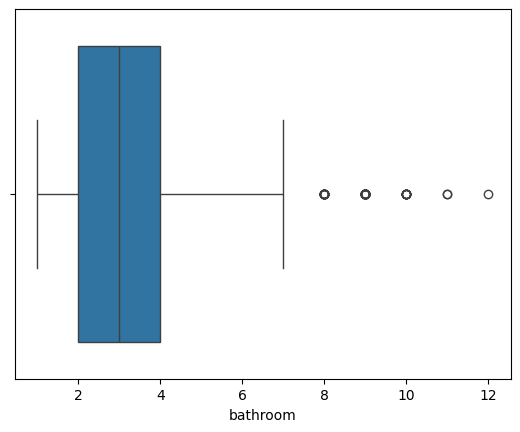

In [168]:
sns.boxplot(x=df['bathroom'])

In [169]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2586,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146
1766,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,1,39
2009,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,2,38


In [170]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss residency,sector 6,0.48,5333.0,900.0,Carpet area: 100 (83.61 sq.m.),3,2,2,2.0,NaN,Moderately Old,NaN,NaN,100.0,0,0,0,0,0,0,54
1,flat,ansal housing highland park,sector 103,1.10,6242.0,1762.0,Super Built up area 1762(163.7 sq.m.)Built Up ...,3,3,3+,7.0,North-East,New Property,1762.0,1500.0,1300.0,0,0,0,0,0,0,87
2,flat,sapphire eighty three,sector 83,0.65,9286.0,700.0,Built Up area: 700 (65.03 sq.m.),1,1,0,6.0,NaN,Undefined,NaN,700.0,NaN,0,0,0,0,0,0,0
3,flat,unitech the residences,sector 33,1.35,8737.0,1545.0,Super Built up area 1545(143.54 sq.m.),3,4,2,8.0,North-East,Moderately Old,1545.0,NaN,NaN,0,1,0,0,0,0,49
4,flat,m3m capital,sector 113,3.25,14142.0,2298.0,Carpet area: 2298 (213.49 sq.m.),4,4,3+,34.0,NaN,Under Construction,NaN,NaN,2298.0,1,1,0,1,0,0,115


# super built up area

C:\Users\Dell\AppData\Local\Temp\ipykernel_23624\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

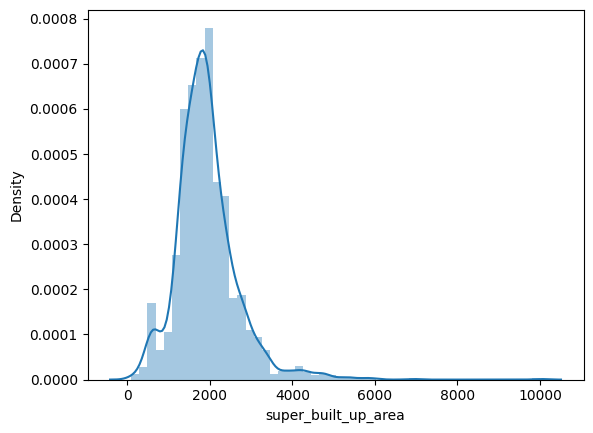

In [171]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

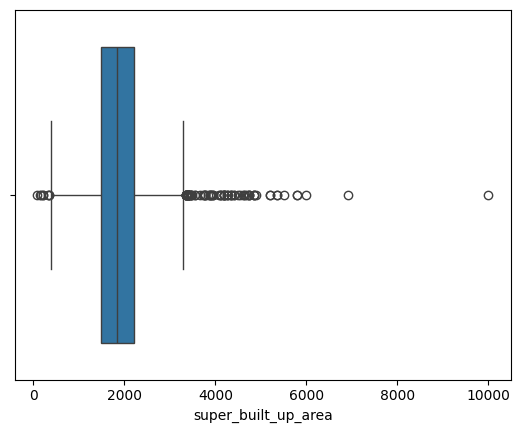

In [172]:
sns.boxplot(x=df['super_built_up_area'])

In [173]:
df['super_built_up_area'].describe()


count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [174]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
130,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49
1774,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140


# built up area

C:\Users\Dell\AppData\Local\Temp\ipykernel_23624\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

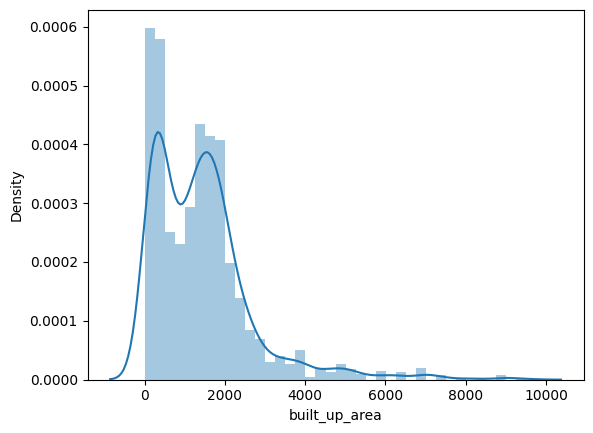

In [175]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

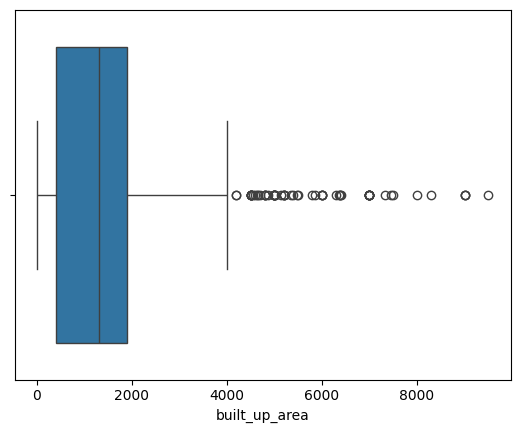

In [177]:
sns.boxplot(x=df['built_up_area'])

In [179]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


# carpet area

C:\Users\Dell\AppData\Local\Temp\ipykernel_23624\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

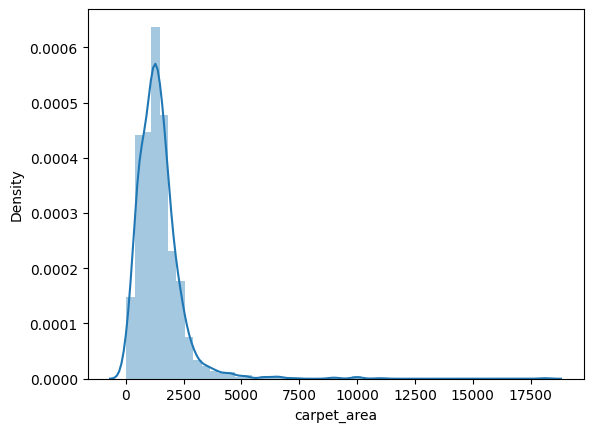

In [180]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

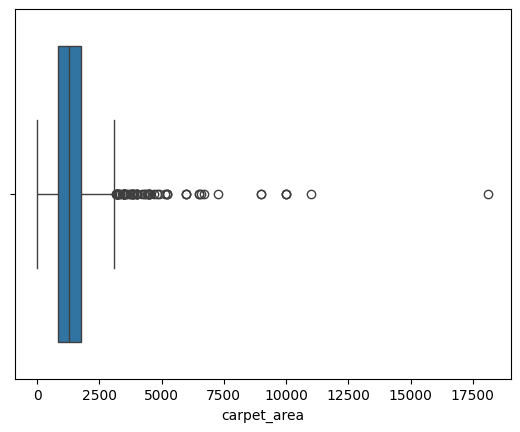

In [181]:
sns.boxplot(x=df['carpet_area'])

In [184]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1396,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1,0,0,1,1,1,44
3224,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [185]:
df.loc[1396,'carpet_area'] = 1812

In [186]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3224,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [187]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss residency,sector 6,0.48,5333.0,900.0,Carpet area: 100 (83.61 sq.m.),3,2,2,2.0,NaN,Moderately Old,NaN,NaN,100.0,0,0,0,0,0,0,54
1,flat,ansal housing highland park,sector 103,1.10,6242.0,1762.0,Super Built up area 1762(163.7 sq.m.)Built Up ...,3,3,3+,7.0,North-East,New Property,1762.0,1500.0,1300.0,0,0,0,0,0,0,87
2,flat,sapphire eighty three,sector 83,0.65,9286.0,700.0,Built Up area: 700 (65.03 sq.m.),1,1,0,6.0,NaN,Undefined,NaN,700.0,NaN,0,0,0,0,0,0,0
3,flat,unitech the residences,sector 33,1.35,8737.0,1545.0,Super Built up area 1545(143.54 sq.m.),3,4,2,8.0,North-East,Moderately Old,1545.0,NaN,NaN,0,1,0,0,0,0,49
4,flat,m3m capital,sector 113,3.25,14142.0,2298.0,Carpet area: 2298 (213.49 sq.m.),4,4,3+,34.0,NaN,Under Construction,NaN,NaN,2298.0,1,1,0,1,0,0,115


C:\Users\Dell\AppData\Local\Temp\ipykernel_23624\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

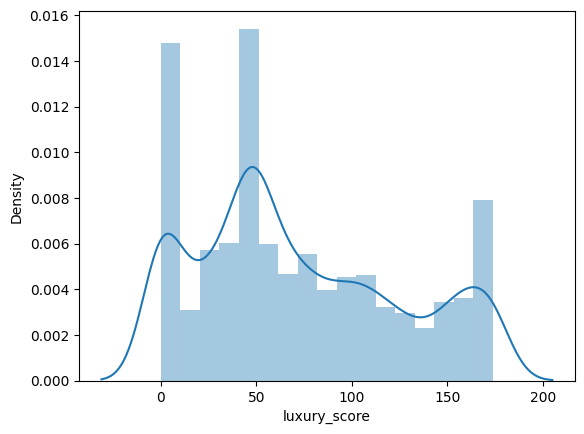

In [188]:
sns.distplot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

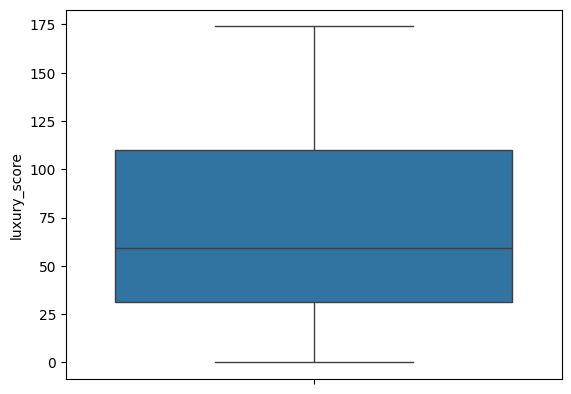

In [189]:
sns.boxplot(df['luxury_score'])

In [190]:
df.shape

(3588, 23)

In [191]:
df['price_per_sqft'] = round((df['price'] * 1e7) / df['area'], 2)


In [192]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss residency,sector 6,0.48,5333.33,900.0,Carpet area: 100 (83.61 sq.m.),3,2,2,2.0,NaN,Moderately Old,NaN,NaN,100.0,0,0,0,0,0,0,54
1,flat,ansal housing highland park,sector 103,1.10,6242.91,1762.0,Super Built up area 1762(163.7 sq.m.)Built Up ...,3,3,3+,7.0,North-East,New Property,1762.0,1500.0,1300.0,0,0,0,0,0,0,87
2,flat,sapphire eighty three,sector 83,0.65,9285.71,700.0,Built Up area: 700 (65.03 sq.m.),1,1,0,6.0,NaN,Undefined,NaN,700.0,NaN,0,0,0,0,0,0,0
3,flat,unitech the residences,sector 33,1.35,8737.86,1545.0,Super Built up area 1545(143.54 sq.m.),3,4,2,8.0,North-East,Moderately Old,1545.0,NaN,NaN,0,1,0,0,0,0,49
4,flat,m3m capital,sector 113,3.25,14142.73,2298.0,Carpet area: 2298 (213.49 sq.m.),4,4,3+,34.0,NaN,Under Construction,NaN,NaN,2298.0,1,1,0,1,0,0,115


C:\Users\Dell\AppData\Local\Temp\ipykernel_23624\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

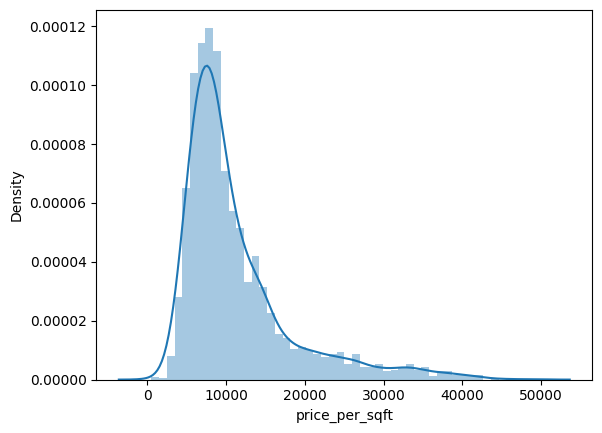

In [193]:
sns.distplot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

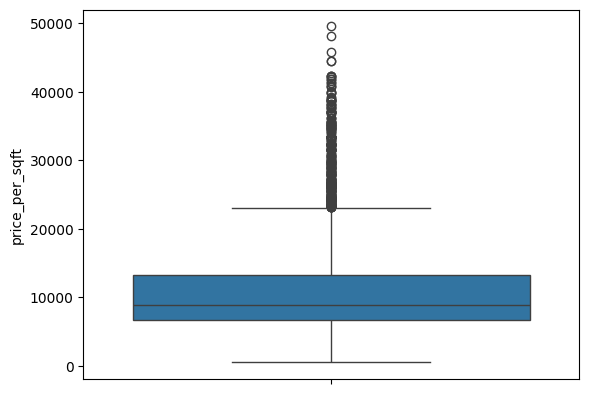

In [194]:
sns.boxplot(df['price_per_sqft'])


In [195]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
295,house,independent,sector 55,5.0,44444.44,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44
922,house,sushant lok 1 builder floors,sector 43,13.0,48148.15,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,300.0,NaN,0,0,0,1,0,1,7
2299,house,dlf city plots,sector 26,19.0,42054.01,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,502.0,NaN,1,1,0,0,0,1,121
2475,house,independent,sector 25,13.0,45710.27,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,316.0,NaN,1,1,1,1,0,2,0
2494,house,independent,sector 26,19.0,42222.22,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,500.0,NaN,1,1,1,1,0,1,103
2754,house,independent,sector 43,9.5,42222.22,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,1,88
3070,house,independent,sector 28,12.0,42194.09,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,316.0,NaN,0,1,1,1,0,1,60
3201,house,independent,sector 105,9.9,49500.00,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
3273,house,independent,sector 26,20.0,44444.44,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,500.0,NaN,0,1,0,1,0,2,97


In [198]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)


250.5

In [199]:
df[(df['area']/df['bedRoom'])<250].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1574,house,independent,sector 4,1.10,6111.11,1800.0,Plot area 200(167.23 sq.m.),8,4,3+,2.0,West,Old Property,NaN,200.0,NaN,0,0,0,0,0,0,7
2276,house,sector 57 huda,sector 57,3.80,26063.10,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,8,8,3+,4.0,East,Relatively New,NaN,162.0,160.0,0,0,1,1,0,1,94
3708,house,independent,sector 105,0.35,7777.78,450.0,Carpet area: 500 (46.45 sq.m.),2,2,1,2.0,East,Undefined,NaN,NaN,500.0,0,0,0,0,0,0,0
82,house,independent,sector 7,0.66,12000.00,550.0,Plot area 550(51.1 sq.m.),3,1,1,3.0,East,Relatively New,NaN,550.0,NaN,0,0,0,0,1,0,22
499,flat,signature global solera,sector 107,0.29,5930.47,489.0,Carpet area: 489 (45.43 sq.m.),2,2,2,3.0,East,Relatively New,NaN,NaN,489.0,0,0,0,0,0,0,45


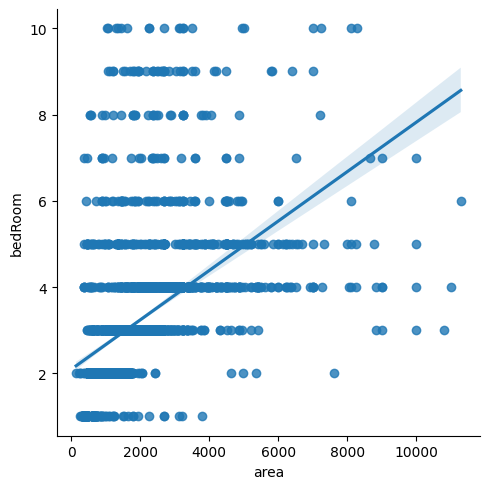

In [200]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [201]:
df['area_room_ratio']=df['area']/df['bedRoom']

In [202]:
(df[(df['area']/df['bedRoom'])<250])['bedRoom'].value_counts()

bedRoom
2     47
3     33
5     28
4     17
6     17
9     15
8     12
7      8
10     8
Name: count, dtype: int64

In [204]:
df=df[df['area_room_ratio']> 100]

In [205]:
outliers_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom']> 3)]

In [206]:
outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_23624\3359844150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom']=round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [207]:
df.update(outliers_df)

In [208]:
df['area_room_ratio']=df['area']/df['bedRoom']

In [209]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom']> 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
107,house,"bhim nagar, sector 6",sector 6,0.85,14096.19,603.0,Plot area 67(6.22 sq.m.),5,2,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,0,29,120.600000
127,house,independent,sector 17,0.32,5663.72,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,0,0,113.000000
357,house,independent,sector 12,2.50,13888.89,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,0,8,200.000000
504,house,shivpuri,sector 7,2.80,12444.44,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,1,0,225.000000
516,house,independent,manesar,1.10,6172.84,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,0,0,222.750000
1038,house,independent,sector 2,0.98,9074.07,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000
1602,house,independent,sector 3 phase 2,0.85,9444.44,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,180.000000
1784,house,independent,sector 3 phase 2,1.10,10000.00,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5,4,2,1.0,East,Undefined,NaN,1100.0,900.0,0,0,0,0,0,0,0,220.000000
1989,house,independent,sector 105,1.10,12222.22,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,150.000000
2295,house,independent,sector 11,3.50,15555.56,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0,225.000000


In [210]:
# 1. Checking the shape of rows where 'area_room_ratio' < 250 and 'bedRoom' > 4
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)].shape


(13, 24)

In [211]:
df.shape

(3568, 24)

In [212]:
# 3. Removing rows where 'area_room_ratio' < 250 and 'bedRoom' > 4
df = df[-((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]


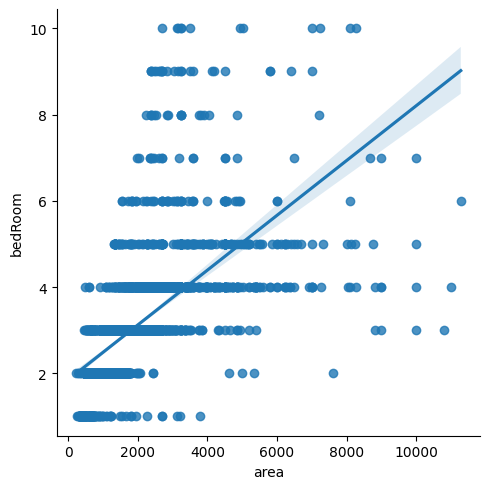

In [213]:
# 4. Plotting 'area' vs 'bedRoom' using seaborn's lmplot
sns.lmplot(data=df, x='area', y='bedRoom')


In [214]:
df.shape

(3555, 24)

In [215]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,ss residency,sector 6,0.48,5333.33,900.0,Carpet area: 100 (83.61 sq.m.),3,2,2,2.0,NaN,Moderately Old,NaN,NaN,100.0,0,0,0,0,0,0,54,300.000000
1,flat,ansal housing highland park,sector 103,1.10,6242.91,1762.0,Super Built up area 1762(163.7 sq.m.)Built Up ...,3,3,3+,7.0,North-East,New Property,1762.0,1500.0,1300.0,0,0,0,0,0,0,87,587.333333
2,flat,sapphire eighty three,sector 83,0.65,9285.71,700.0,Built Up area: 700 (65.03 sq.m.),1,1,0,6.0,NaN,Undefined,NaN,700.0,NaN,0,0,0,0,0,0,0,700.000000
3,flat,unitech the residences,sector 33,1.35,8737.86,1545.0,Super Built up area 1545(143.54 sq.m.),3,4,2,8.0,North-East,Moderately Old,1545.0,NaN,NaN,0,1,0,0,0,0,49,515.000000
4,flat,m3m capital,sector 113,3.25,14142.73,2298.0,Carpet area: 2298 (213.49 sq.m.),4,4,3+,34.0,NaN,Under Construction,NaN,NaN,2298.0,1,1,0,1,0,0,115,574.500000


In [216]:
df.to_csv('gurgaon_properties_outlier_treated.csv',index=False)